In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

In [3]:
from matplotlib.colors import ListedColormap
%matplotlib inline

## Classificação

Vamos trabalhar com o dataset iris, onde queremos classificar o tipo de flor com base em medidas das petalas e sepalas

In [4]:
iris = load_iris()

In [5]:
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                           columns= iris['feature_names'] + ['target'])

In [6]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Vamos ver como fica a fronteira de decisão com uma regressão logistica simples nas duas primeiras variaveis - comprimento e largura da sepala

In [7]:
lr = LogisticRegression(C=1e5, multi_class='auto')

In [8]:
y = iris_df["target"].values
X = iris_df.drop("target", axis=1).values
lr.fit(X[:, :2], y)

C:\Users\gabri\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='auto', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

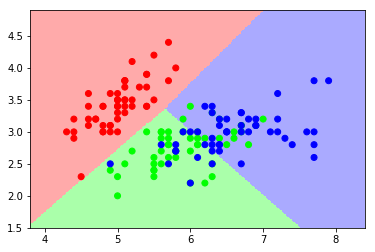

In [9]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

Conseguimos ver que uma das classes é linearmente separável das outras mas a divisão entre as outras duas é mais complicada.

Agora vamos ver como uma árvore de decisão resolve esse problema

In [10]:
dt = DecisionTreeClassifier(criterion='entropy')

In [11]:
y = iris_df["target"].values
X = iris_df.drop("target", axis=1).values
dt.fit(X[:, :2], y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Assim como outros classificadores, as árvores de decisão podem nos retornar as probabilidades para cada uma das classes

In [12]:
dt.predict_proba(X[:, :2])

array([[1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.

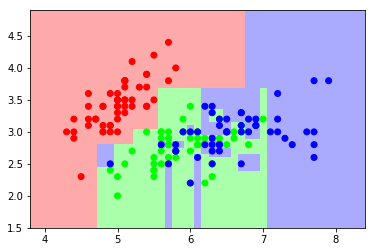

In [13]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

Assim como outros classificadores, as árvores de decisão podem nos retornar as probabilidades para cada uma das classes

Visualização da árvore construida

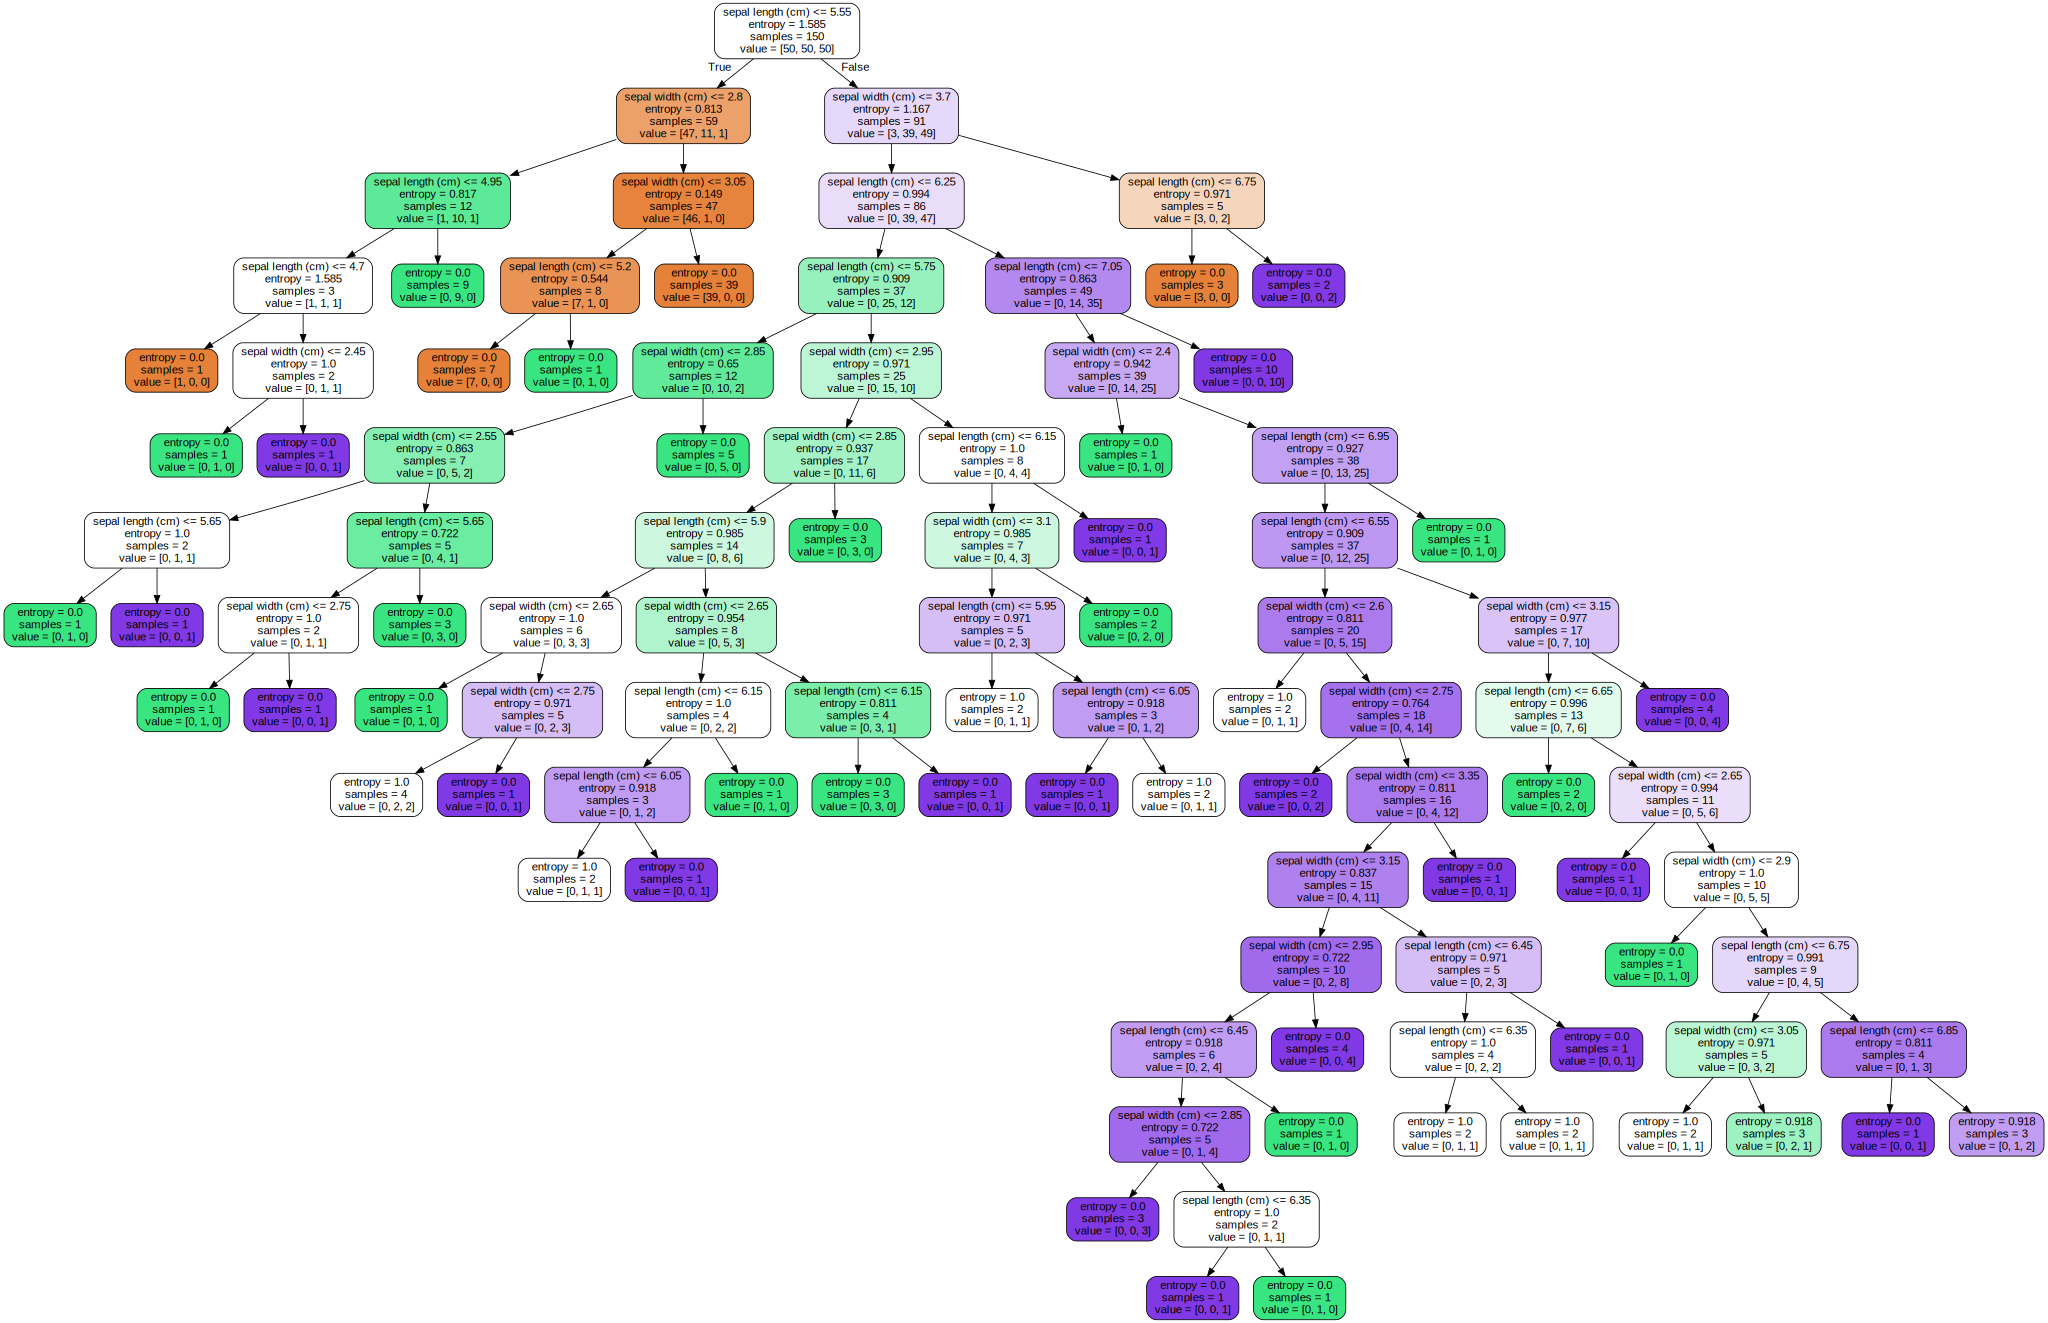

In [14]:
from IPython.display import SVG
from graphviz import Source

graph = Source(tree.export_graphviz(dt, 
                                    out_file=None, 
                                    feature_names=['sepal length (cm)', 'sepal width (cm)'],
                                    filled=True,
                                    rounded=True))
SVG(graph.pipe(format='svg'))

## Desafio

Vamos tentar implementar nossa própria árvore de decisão! 

Considerem apenas árvores binárias para classificação, com ganho de informação (entropia) como critério de divisão e features continuas

Dica: Pensem na estrutura para representar a árvore. Quais atributos são necessários?

In [15]:
class ArvoreClassificacaoSimples():
    def __init__(self):
        self.dados = None
        self.colunas_preditoras = None
        self.coluna_resposta = None
        
        # no raiz da arvore
        self.raiz = None

    def treino(self, dados, colunas_preditora, coluna_resposta):
        # dados: DataFrame pandas
        # colunas_preditora: lista com strings dos nomes das colunas das variáveis de predição (features)
        # coluna_resposta: string do nome da coluna da variável de resposta
        #
        # atualize o valor de self.dados, self.coluna_preditora e 
        # self.coluna_resposta
        #
        #
        # OBS: nenhuma das outras funções deve ser rodada antes do treino.
        pass

    def predicao(self, x):
        # x: DataFrame pandas com as mesmas colunas preditoras
        #
        # implemente e retorne a predicao usando a arvore aprendida no treino
        pass


In [16]:
# Chamada para treino e validacao

In [17]:
treino, teste = train_test_split(iris_df, random_state=12)

In [18]:
minha_dt = ArvoreClassificacaoSimples()

In [19]:
minha_dt.treino(treino, ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)'], 'target')

In [20]:
minha_dt.predicao(teste[['sepal length (cm)', 'sepal width (cm)']])